# Evaluation


## 1. Purpose
- We compared the performance across models (baseline, cross-validation results, and test predictions).
- Visualized results to determine the best-performing model based on:
  - Cross-validation (CV) metrics.
  - Test set prediction results.
- Ensured consistency between the CV-selected model and test set results.

## 2. Steps

### Step 1: Load Results
- Loaded saved metrics for:
  - Cross-validation results (mean and standard deviation).
  - Test set predictions for each model.
  
### Step 2: Comparative Plots
#### **Cross-Validation Metrics**
- Created a **bar chart** comparing the mean CV scores of all models.
- Discuss which model performs the best in CV and its stability.

#### **Test Set Predictions**
- Create a **bar chart** to compare performance metrics (e.g., accuracy, F1-score, AUC-ROC) across models on the test set.
- Highlight if the best CV model aligns with the best test set results.

### Step 3: Consistency Check
- Compare the model chosen based on CV with the one performing best on the test set.
- If the results differ:
  - Analyze and document potential reasons (e.g., overfitting, test set bias).

### Step 4: Feature Importance
- Plot feature importance (e.g., for Random Forest, XGBoost) to visualize which features contribute the most to the predictions.
- Use SHAP values or similar tools for advanced interpretability.

### Step 5: Final Recommendation
- Based on the plots and analysis, recommend the best-performing model.
- Document why this model is preferred (e.g., consistency across CV and test, interpretability, etc.).

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)

## Import data

In [121]:
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

In [122]:
# List of tuples containing model names and their corresponding file paths
files = [
    ("Logistic Regression CV", "../2_data/evaluation_metrics/LogisticRegression_cv.csv"),
    ("Logistic Regression Prediction", "../2_data/evaluation_metrics/LogisticRegression_prediction.csv"),
    ("Random Forest CV", "../2_data/evaluation_metrics/RandomForest_cv.csv"),
    ("Random Forest Prediction", "../2_data/evaluation_metrics/RandomForest_prediction.csv"),
    ("XGBoost CV", "../2_data/evaluation_metrics/XGBoost_cv.csv"),
    ("XGBoost Prediction", "../2_data/evaluation_metrics/XGBoost_prediction.csv"),
    ("Baseline Prediction", "../2_data/evaluation_metrics/Baseline_prediction.csv"),
    ("Baseline Random Prediction", "../2_data/evaluation_metrics/BaselineRandom_prediction.csv"),
    ("Baseline Rule Based Prediction", "../2_data/evaluation_metrics/BaselineRuleBased_prediction.csv"),
    ("Decision Tree CV", "../2_data/evaluation_metrics/DecisionTree_cv.csv"),
    ("Decision Tree Prediction", "../2_data/evaluation_metrics/DecisionTree_prediction.csv"),
    ("GNB CV", "../2_data/evaluation_metrics/GNB_cv.csv"),
    ("GNB Prediction", "../2_data/evaluation_metrics/GNB_prediction.csv"),
    ("KNN CV", "../2_data/evaluation_metrics/KNN_cv.csv"),
    ("KNN Prediction", "../2_data/evaluation_metrics/KNN_prediction.csv"),
    ("MLP CV", "../2_data/evaluation_metrics/MLP_cv.csv"),
    ("MLP Prediction", "../2_data/evaluation_metrics/MLP_prediction.csv"),
    ("MNB CV", "../2_data/evaluation_metrics/MNB_cv.csv"),
    ("MNB Prediction", "../2_data/evaluation_metrics/MNB_prediction.csv"),
    ("Nearest Centroid CV", "../2_data/evaluation_metrics/NearestCentroid_cv.csv"),
    ("Nearest Centroid Prediction", "../2_data/evaluation_metrics/NearestCentroid_prediction.csv"),
    ("SVM CV", "../2_data/evaluation_metrics/SVM_cv.csv"),
    ("SVM Prediction", "../2_data/evaluation_metrics/SVM_prediction.csv")
]

# Read predictions into a dictionary of DataFrames
results = {model: pd.read_csv(file) for model, file in files}

# Extract model names
model_names = [model for model, _ in files]


## Comparative Plots

## Cross-Validation Prediction

['Logistic Regression CV', 'Random Forest CV', 'XGBoost CV', 'Decision Tree CV', 'GNB CV', 'KNN CV', 'MLP CV', 'MNB CV', 'Nearest Centroid CV', 'SVM CV']


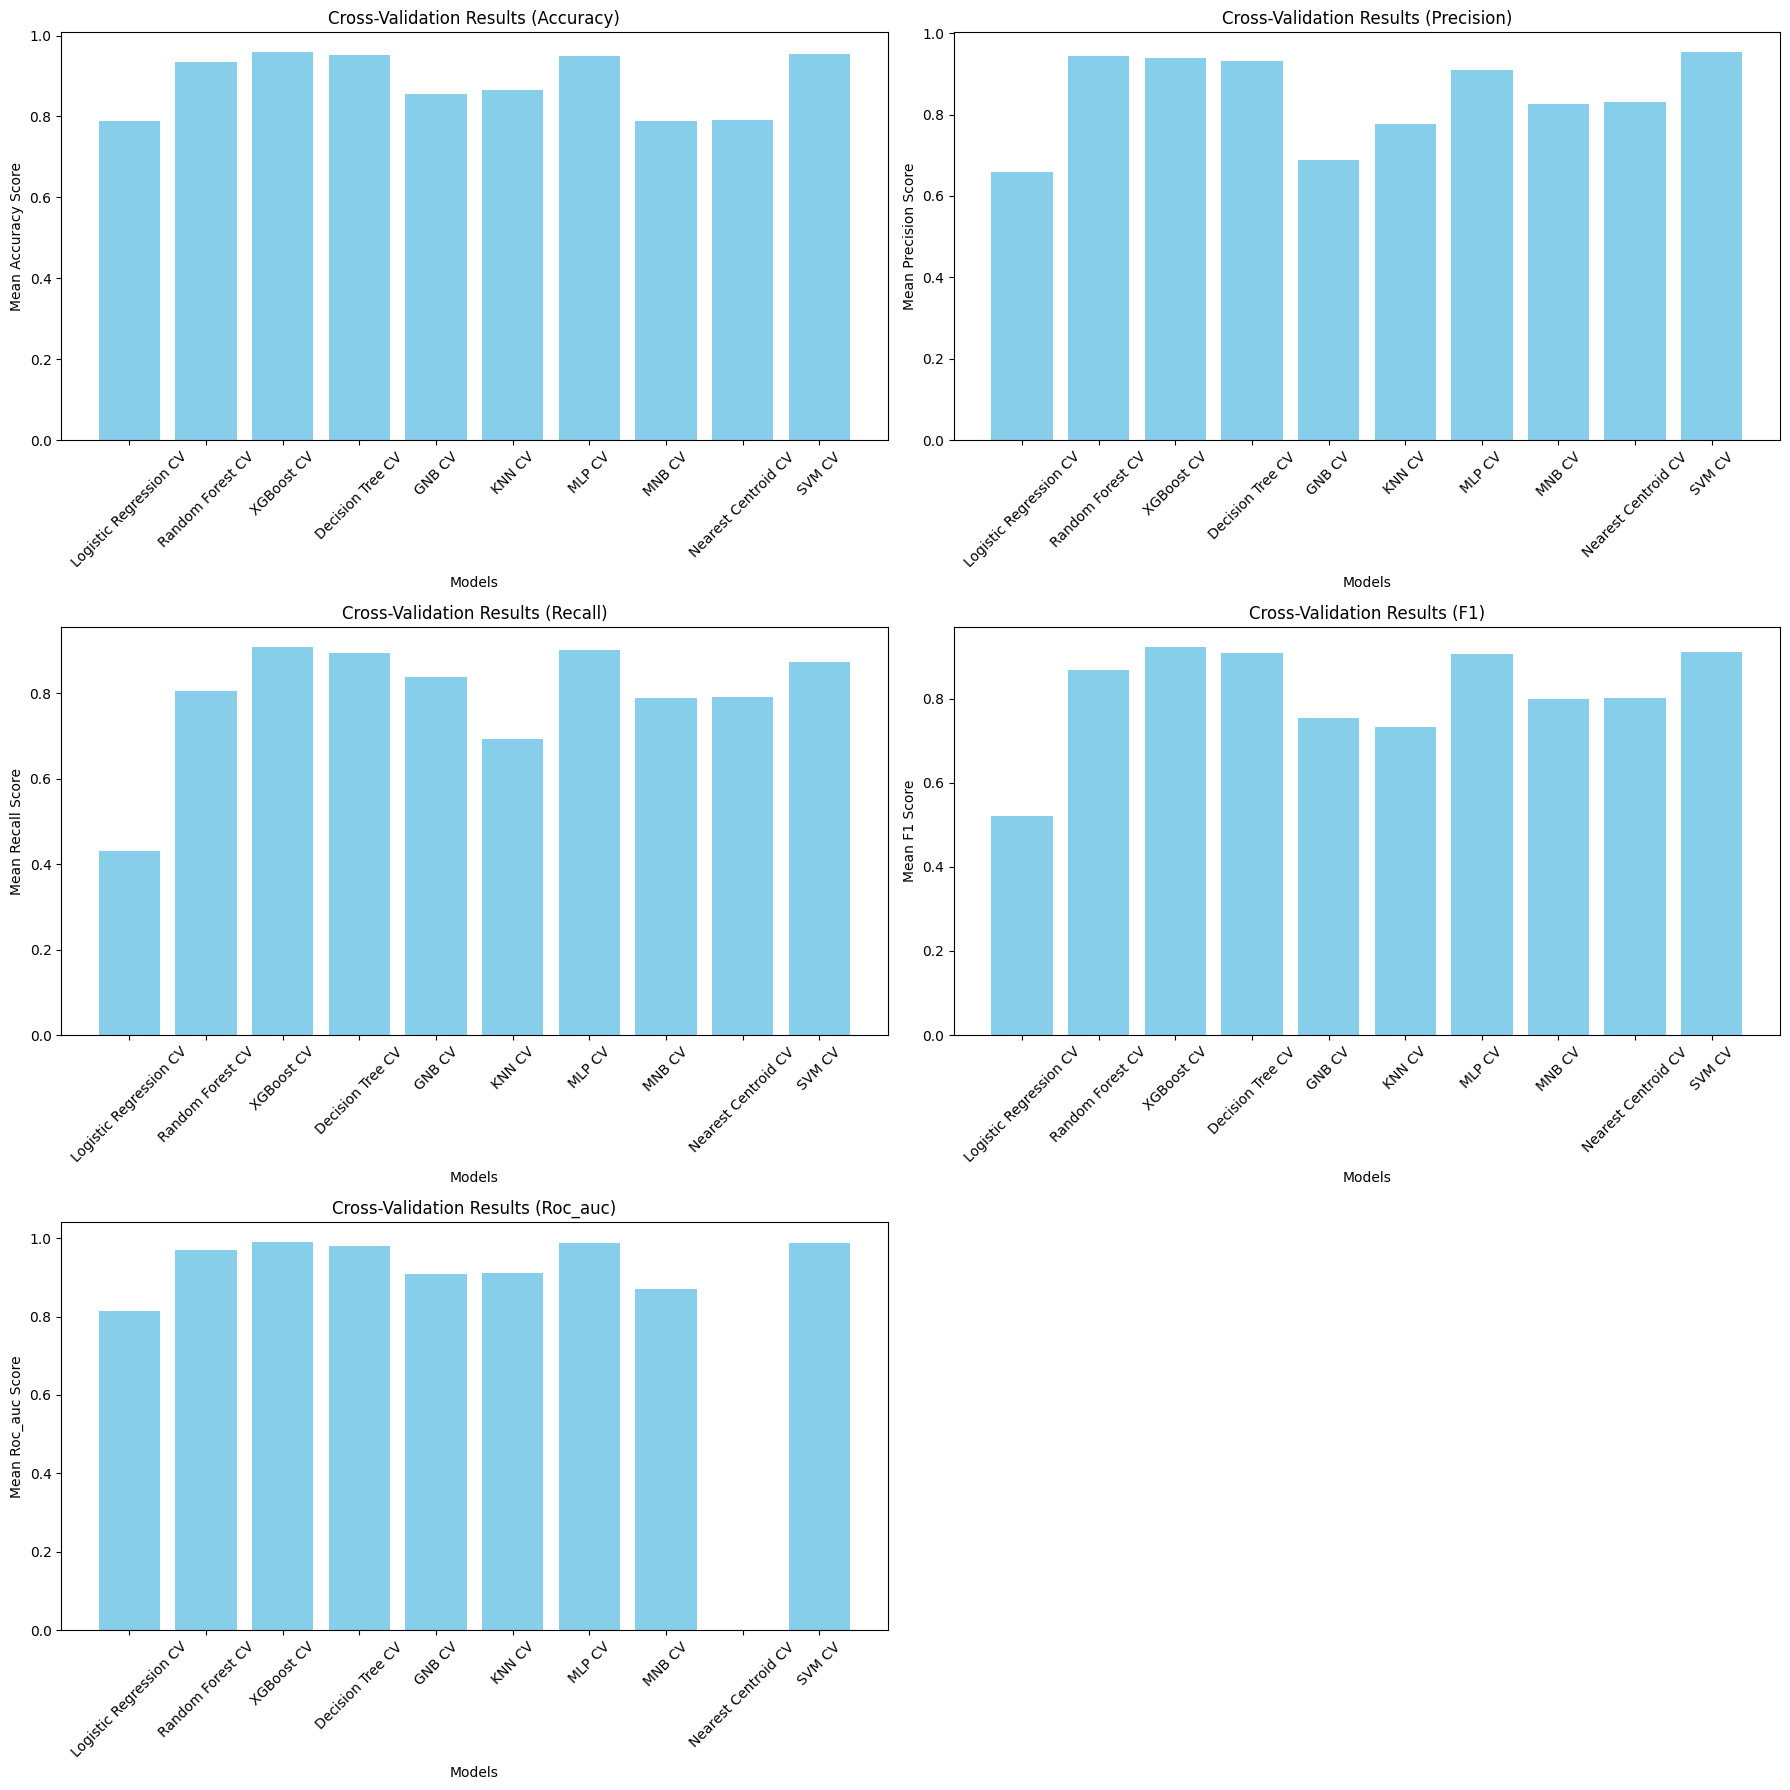

In [123]:
# Extract model names, mean scores, and standard deviations for CV models only
cv_model_names = [model for model in model_names if 'CV' in model and model in results]

print(cv_model_names)

# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(cv_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [124]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=cv_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                        accuracy  precision    recall        f1   roc_auc
XGBoost CV              0.960067   0.939163  0.908389  0.923462  0.990872
SVM CV                  0.955098   0.954556  0.872264  0.911376  0.987894
Decision Tree CV        0.952433   0.930946  0.894327  0.908329  0.979238
MLP CV                  0.949952   0.909706  0.901034  0.905235  0.988071
Random Forest CV        0.935214   0.944120  0.803987  0.867835  0.968690
Nearest Centroid CV     0.791794   0.830440  0.791794  0.801233       NaN
MNB CV                  0.788954   0.826572  0.788954  0.798408  0.870057
GNB CV                  0.855700   0.687729  0.836805  0.754561  0.908722
KNN CV                  0.865463   0.777933  0.691642  0.731722  0.910062
Logistic Regression CV  0.789674   0.658927  0.431459  0.520876  0.813409


The `roc_auc` value is currently not available due to an error encountered during its calculation.


### Qualitative Evaluation of Models Based on Cross-Validation Scores

#### XGBoost CV
- **F1 Score**: 0.923462
- **Accuracy**: 0.960067
- **Precision**: 0.939163
- **Recall**: 0.908389
- **ROC AUC**: 0.990872

**Evaluation**: XGBoost performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to handle non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### SVM CV
- **F1 Score**: 0.911376
- **Accuracy**: 0.955098
- **Precision**: 0.954556
- **Recall**: 0.872264
- **ROC AUC**: 0.987894

**Evaluation**: SVM also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### Decision Tree CV
- **F1 Score**: 0.908329
- **Accuracy**: 0.952433
- **Precision**: 0.930946
- **Recall**: 0.894327
- **ROC AUC**: 0.979238

**Evaluation**: Decision Tree performs well but is prone to overfitting, which might explain its slightly lower recall compared to XGBoost and SVM. It is still a strong performer with good interpretability. The model's performance can be attributed to its ability to capture non-linear relationships, but it might overfit the training data, leading to slightly lower generalization performance.

#### MLP CV
- **F1 Score**: 0.905235
- **Accuracy**: 0.949952
- **Precision**: 0.909706
- **Recall**: 0.901034
- **ROC AUC**: 0.988071

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest CV
- **F1 Score**: 0.867835
- **Accuracy**: 0.935214
- **Precision**: 0.944120
- **Recall**: 0.803987
- **ROC AUC**: 0.968690

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### Nearest Centroid CV
- **F1 Score**: 0.801233
- **Accuracy**: 0.791794
- **Precision**: 0.830440
- **Recall**: 0.791794
- **ROC AUC**: NaN

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### MNB CV
- **F1 Score**: 0.798408
- **Accuracy**: 0.788954
- **Precision**: 0.826572
- **Recall**: 0.788954
- **ROC AUC**: 0.870057

**Evaluation**: MNB performs similarly to Nearest Centroid, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### GNB CV
- **F1 Score**: 0.754561
- **Accuracy**: 0.855700
- **Precision**: 0.687729
- **Recall**: 0.836805
- **ROC AUC**: 0.908722

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN CV
- **F1 Score**: 0.731722
- **Accuracy**: 0.865463
- **Precision**: 0.777933
- **Recall**: 0.691642
- **ROC AUC**: 0.910062

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Logistic Regression CV
- **F1 Score**: 0.520876
- **Accuracy**: 0.789674
- **Precision**: 0.658927
- **Recall**: 0.431459
- **ROC AUC**: 0.813409

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
XGBoost and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. Decision Tree and MLP also perform well, with Random Forest showing strong precision but lower recall. Simpler models like Nearest Centroid, MNB, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.


## Test Set Prediction

In [ ]:
# Extract model names, mean scores, and standard deviations for CV models only
test_model_names = [model for model in model_names if 'Prediction' in model and model in results]

print(test_model_names)

['Logistic Regression Prediction', 'Random Forest Prediction', 'XGBoost Prediction', 'Baseline Prediction', 'Baseline Random Prediction', 'Baseline Rule Based Prediction', 'Decision Tree Prediction', 'GNB Prediction', 'KNN Prediction', 'MLP Prediction', 'MNB Prediction', 'Nearest Centroid Prediction', 'SVM Prediction']


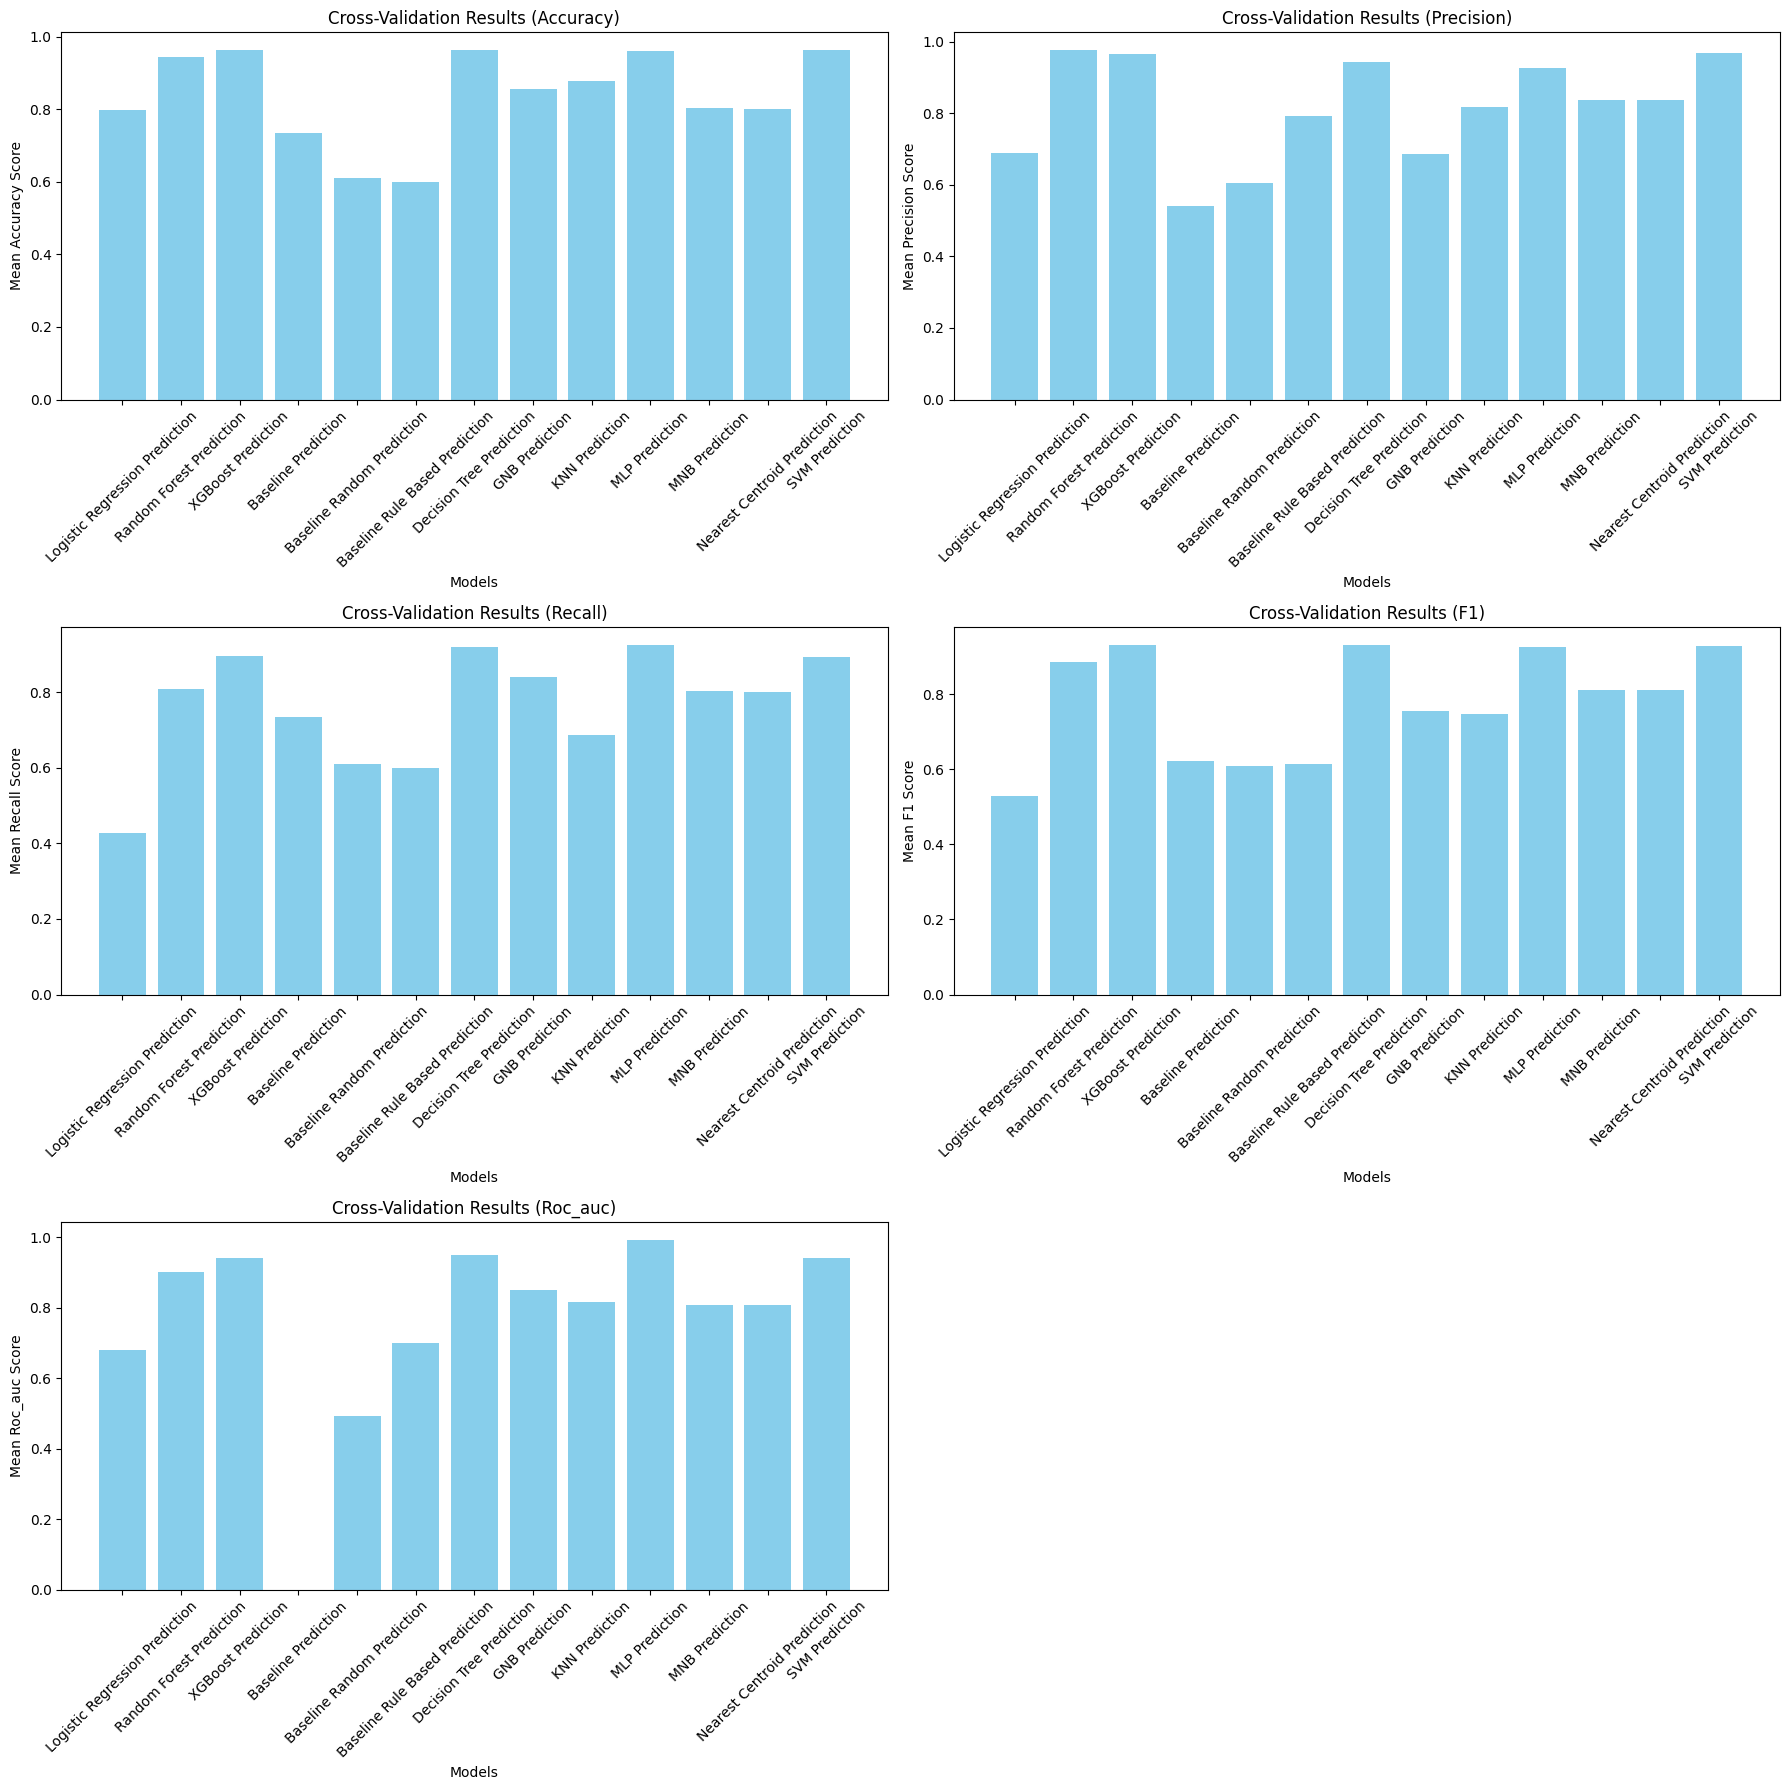

In [ ]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(test_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [130]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=test_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                                accuracy  precision    recall        f1  \
Decision Tree Prediction        0.963804   0.942466  0.919786  0.930988   
XGBoost Prediction              0.963804   0.965418  0.895722  0.929265   
SVM Prediction                  0.963804   0.968116  0.893048  0.929068   
MLP Prediction                  0.960965   0.927614  0.925134  0.926372   
Random Forest Prediction        0.943932   0.977346  0.807487  0.884334   
MNB Prediction                  0.803407   0.835809  0.803407  0.811735   
Nearest Centroid Prediction     0.800568   0.836163  0.800568  0.809397   
GNB Prediction                  0.855216   0.685590  0.839572  0.754808   
KNN Prediction                  0.876508   0.818471  0.687166  0.747093   
Baseline Prediction             0.734564   0.539584  0.734564  0.622155   
Baseline Rule Based Prediction  0.598297   0.792817  0.598297  0.614801   
Baseline Random Prediction      0.610362   0.604618  0.610362  0.607418   
Logistic Regression Predi

### Qualitative Evaluation of Models Based on Test Set Predictions

#### Decision Tree Prediction
- **F1 Score**: 0.930988
- **Accuracy**: 0.963804
- **Precision**: 0.942466
- **Recall**: 0.919786
- **ROC AUC**: 0.949748

**Evaluation**: Decision Tree performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to capture non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### XGBoost Prediction
- **F1 Score**: 0.929265
- **Accuracy**: 0.963804
- **Precision**: 0.965418
- **Recall**: 0.895722
- **ROC AUC**: 0.942064

**Evaluation**: XGBoost also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree in recall, suggesting it might miss some true positives. XGBoost's performance is likely due to its ability to handle non-linear relationships and interactions between features, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### SVM Prediction
- **F1 Score**: 0.929068
- **Accuracy**: 0.963804
- **Precision**: 0.968116
- **Recall**: 0.893048
- **ROC AUC**: 0.941210

**Evaluation**: SVM shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree and XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### MLP Prediction
- **F1 Score**: 0.926372
- **Accuracy**: 0.960965
- **Precision**: 0.927614
- **Recall**: 0.925134
- **ROC AUC**: 0.992630

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest Prediction
- **F1 Score**: 0.884334
- **Accuracy**: 0.943932
- **Precision**: 0.977346
- **Recall**: 0.807487
- **ROC AUC**: 0.900362

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### MNB Prediction
- **F1 Score**: 0.811735
- **Accuracy**: 0.803407
- **Precision**: 0.835809
- **Recall**: 0.803407
- **ROC AUC**: 0.807271

**Evaluation**: MNB performs moderately well, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### Nearest Centroid Prediction
- **F1 Score**: 0.809397
- **Accuracy**: 0.800568
- **Precision**: 0.836163
- **Recall**: 0.800568
- **ROC AUC**: 0.807900

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### GNB Prediction
- **F1 Score**: 0.754808
- **Accuracy**: 0.855216
- **Precision**: 0.685590
- **Recall**: 0.839572
- **ROC AUC**: 0.850221

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN Prediction
- **F1 Score**: 0.747093
- **Accuracy**: 0.876508
- **Precision**: 0.818471
- **Recall**: 0.687166
- **ROC AUC**: 0.816047

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Baseline Prediction
- **F1 Score**: 0.622155
- **Accuracy**: 0.734564
- **Precision**: 0.539584
- **Recall**: 0.734564
- **ROC AUC**: 0.000000

**Evaluation**: Baseline Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Rule Based Prediction
- **F1 Score**: 0.614801
- **Accuracy**: 0.598297
- **Precision**: 0.792817
- **Recall**: 0.598297
- **ROC AUC**: 0.698394

**Evaluation**: Baseline Rule Based Prediction shows lower performance, particularly in recall, indicating it misses many true positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Random Prediction
- **F1 Score**: 0.607418
- **Accuracy**: 0.610362
- **Precision**: 0.604618
- **Recall**: 0.610362
- **ROC AUC**: 0.493155

**Evaluation**: Baseline Random Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Logistic Regression Prediction
- **F1 Score**: 0.528053
- **Accuracy**: 0.797019
- **Precision**: 0.689655
- **Recall**: 0.427807
- **ROC AUC**: 0.679121

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
Decision Tree, XGBoost, and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. MLP also performs well, with Random Forest showing strong precision but lower recall. Simpler models like MNB, Nearest Centroid, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.

## Evaluation of Cross Validation Performance and Test set performance

                        accuracy  precision    recall        f1   roc_auc
XGBoost CV              0.960067   0.939163  0.908389  0.923462  0.990872
SVM CV                  0.955098   0.954556  0.872264  0.911376  0.987894
Decision Tree CV        0.952433   0.930946  0.894327  0.908329  0.979238
MLP CV                  0.949952   0.909706  0.901034  0.905235  0.988071
Random Forest CV        0.935214   0.944120  0.803987  0.867835  0.968690
Nearest Centroid CV     0.791794   0.830440  0.791794  0.801233       NaN
MNB CV                  0.788954   0.826572  0.788954  0.798408  0.870057
GNB CV                  0.855700   0.687729  0.836805  0.754561  0.908722
KNN CV                  0.865463   0.777933  0.691642  0.731722  0.910062
Logistic Regression CV  0.789674   0.658927  0.431459  0.520876  0.813409




In [ ]:
# Initialize a dictionary to store the average scores for each model
average_scores = {}

# Calculate the average score for each model
for model, df in results.items():
    scores = {
        'accuracy': df['accuracy'].mean(),
        'precision': df['precision'].mean(),
        'recall': df['recall'].mean(),
        'f1': df['f1'].mean(),
        'roc_auc': df['roc_auc'].mean() if 'roc_auc' in df.columns else 0
    }
    average_scores[model] = np.mean(list(scores.values()))

# Determine the best model based on the highest average score
best_model = max(average_scores, key=average_scores.get)
print(f"The best model is {best_model} with an average score of {average_scores[best_model]:.4f}")

The best model is MLP Prediction with an average score of 0.9465


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pandas as pd

# Load your dataset
X = X_test
y = y_test

# Define the models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# Apply k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results[model_name] = cv_results.mean()
    print(f"{model_name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# Determine the best model based on cross-validation results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an average accuracy of {results[best_model]:.4f}")

Naive Bayes: 0.8126 (+/- 0.0125)
Logistic Regression: 0.7956 (+/- 0.0343)
KNN: 0.7452 (+/- 0.0258)
Decision Tree: 0.9226 (+/- 0.0133)


/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Random Forest: 0.9517 (+/- 0.0058)
SVM: 0.7346 (+/- 0.0326)


/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

MLP: 0.7502 (+/- 0.0560)
XGBoost: 0.9567 (+/- 0.0085)
The best model is XGBoost with an average accuracy of 0.9567
